<img src='https://walkthru360.com/wp-content/uploads/2017/11/Ignite-gaming-lounge-chicago-virtual-tour-360_IMG_5805_6_7.jpg'>

# Understanding the Gaming Market

## Project description
The gaming market is one of the most dynamic fields to work in. What was once considered the exclusive domain of geeks, now it addresses a huge part of the population, young and not so young, men and women together. There are now gaming eSports championships with total prizes of hundreds of millions of dollars, proffessional teams and hardened fans. The advance in gaming technology led the way to more and more performant personal computers and gaming consoles.
<br>
We have here a huge database of thousands of games in the last 40 years. We have information for each game about their genre, user and expert reviews, platform (e.g. Xbox or PlayStation) and historical data on game sales in several regions.
<br>
We will try to identify patterns that determine whether a game succeeds or not in the next year (2017). Exciting!

## Opening and investigating the data

In [1]:
#making we have the same versions
# !pip install -U pandas
# !pip install -U matplotlib
# !pip install -U numpy
# !pip install -U seaborn
# !pip install -U joypy
# !pip install -U scipy


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import seaborn as sns
import joypy
from scipy import stats as st

try:
    # If we are online on the Jupyter Hub, we open the online database
    gms_data = pd.read_csv('/datasets/games.csv',sep=',')
except:
    # If we are locally we open the local database
    gms_data=pd.read_csv("dataset/games.csv",sep=',')

In [4]:
def investigate_data(data):
    print(' ==================== Table ==========================')
    display(data.head())
    print(' -------------------- Info ---------------------------')
    print(data.info())
    print('The shape is:', data.shape)
    print(' -------------- Data description ----------------------')
    display(data.describe().T)
    print('Number of duplicated rows :', data.duplicated().sum())
    
def investigate_data(data):
    print(' ==================== Table ==========================')
    display(data.head().T)
    print(' -------------------- Info ---------------------------')
    print(data.info())
    print('The shape is:',data.shape)
    print(' -------------- Data description ----------------------')
    display(data.describe().T)
    display(data.describe(include=['object']).T)
    print('Number of duplicated rows :', data.duplicated().sum())


In [5]:
investigate_data(gms_data)

 ==================== Table ==========================


,0,1,2,3,4
Name,Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue
Platform,Wii,NES,Wii,Wii,GB
Year_of_Release,2006.0,1985.0,2008.0,2009.0,1996.0
Genre,Sports,Platform,Racing,Sports,Role-Playing
NA_sales,41.36,29.08,15.68,15.61,11.27
EU_sales,28.96,3.58,12.76,10.93,8.89
JP_sales,3.77,6.81,3.79,3.28,10.22
Other_sales,8.45,0.77,3.29,2.95,1.0
Critic_Score,76.0,NaN,82.0,80.0,NaN
User_Score,8,NaN,8.3,8,NaN


 -------------------- Info ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
The shape is: (16715, 11)
 -------------- Data description ----------------------


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


Number of duplicated rows : 0


### Conclusion

We notice at first sight several issues with the data: Columns are not in lowercase, null values in 6 of the columns, several columns with type which is not ideal for the content.

## Data preprocessing

First we replace the column names (make them lowercase).

In [6]:
gms_data.columns=gms_data.columns.str.lower()

We see the name is missing from two games. Let's check them out.

In [7]:
gms_data[gms_data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Two old games with no name and very low sales. It's obvious we need to drop them.

In [8]:
gms_data.dropna(subset=['name'],inplace=True)

In [9]:
gms_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


### Checking Sales Columns

We have no null values in these columns. We have many 0 values, but this is normal since many games are sold only in North America, for example, and not in Japan.

We want a column with total sales, and variables with total sales in each region.

In [10]:
gms_data['total_sales']=gms_data['na_sales']+gms_data['eu_sales']+gms_data['jp_sales']+gms_data['other_sales']
total_na_sales=gms_data['na_sales'].sum()
total_eu_sales=gms_data['eu_sales'].sum()
total_jp_sales=gms_data['jp_sales'].sum()
total_ot_sales=gms_data['other_sales'].sum()
total_sales=total_na_sales+total_eu_sales+total_jp_sales+total_ot_sales

### Fixing Year of Release column

How many null values do we have?

In [11]:
print('We have',len(gms_data[gms_data['year_of_release'].isnull()]),'null values in the year_of_release column which represents {:.2%} of the total rows.'.format(len(gms_data[gms_data['year_of_release'].isnull()])/len(gms_data)))

We have 269 null values in the year_of_release column which represents 1.61% of the total rows.


In [12]:
gms_data[gms_data['year_of_release'].isnull()].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10837,Egg Monster Hero,DS,NaN,Role-Playing,0.00,0.00,0.09,0.00,NaN,NaN,E,0.09
9761,Saru! Get You! Million Monkeys,PS2,NaN,Platform,0.00,0.00,0.12,0.00,NaN,NaN,NaN,0.12
5443,Bejeweled 3,DS,NaN,Puzzle,0.29,0.02,0.00,0.02,75.0,tbd,E,0.33
3024,"The Chronicles of Narnia: The Lion, The Witch ...",GBA,NaN,Action,0.48,0.18,0.00,0.01,66.0,6.8,E,0.67
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47


In [13]:
gms_data[gms_data['name']=='Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


We realize that in many cases we can take the year of release from the release of the same game on other platforms. Let's do this.

In [14]:
#this function will return the first not null value in the series, if exists.
#if there are only null values it returns 0
def get_not_null_value(data):
    for x in data:
        if type(x) is float:
            if x>0:
                return x
    return 0

In [15]:
gms_data["year_of_release"] = gms_data.groupby("name")['year_of_release'].\
        transform(lambda x: x.fillna(get_not_null_value(x)))

We succesfully dealt with some of the games with *year_of_release* missing. Let's see what is left

In [16]:
print('We have',len(gms_data[gms_data['year_of_release']==0]),'values of 0 in the year_of_release column which represents {:.2%} of the total rows.'.format(len(gms_data[gms_data['year_of_release']==0])/len(gms_data)))

We have 146 values of 0 in the year_of_release column which represents 0.87% of the total rows.


Now we convert the columns to appropriate data types. Year of release must be *int* and user score must be *float*.

In [17]:
gms_data.year_of_release=gms_data.year_of_release.astype('int')

Many games have in their name the next year after their release. For example, *Madden NFL 2004* was released in 2003. We can try to extract from their name the release year.

In [18]:
def extract_year_from_name(row):
    name_ending=row['name'][-4:]
    try:
        return int(name_ending)-1
    except:
        return 0

In [19]:
gms_data.loc[gms_data['year_of_release']==0,'year_of_release']=gms_data[gms_data['year_of_release']==0].apply(lambda x: extract_year_from_name(x),axis=1)

In [20]:
print('We have',len(gms_data[gms_data['year_of_release']==0]),'values of 0 in the year_of_release column which represents {:.2%} of the total rows.'.format(len(gms_data[gms_data['year_of_release']==0])/len(gms_data)))

We have 138 values of 0 in the year_of_release column which represents 0.83% of the total rows.


After a lot of work we managed to add the year of release to 6 more games!! 🤦‍♂️

In [21]:
gms_data[gms_data['year_of_release']==0].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales
count,138.0,138.000000,138.000000,138.000000,138.000000,58.000000,138.000000
mean,0.0,0.181159,0.051159,0.034348,0.019348,65.982759,0.286014
std,0.0,0.333066,0.101385,0.099274,0.045709,15.780836,0.436135
min,0.0,0.000000,0.000000,0.000000,0.000000,22.000000,0.010000
25%,0.0,0.000000,0.000000,0.000000,0.000000,54.000000,0.050000
50%,0.0,0.065000,0.010000,0.000000,0.000000,69.000000,0.125000
75%,0.0,0.180000,0.060000,0.020000,0.010000,77.750000,0.317500
max,0.0,2.150000,0.560000,0.630000,0.350000,92.000000,2.470000


We see that on one hand the max sale is very high, 2.4 million dollars, and very high score (9.2), the vast majority of these games have very low sales (75% are belor 320.000 $). **We don't want to lose the high value games**.

In [22]:
gms_data[gms_data['year_of_release']==0].sort_values(by='total_sales',ascending=False).head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62
1301,Triple Play 99,PS,0,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN,1.46
1506,Adventure,2600,0,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN,1.30
1585,Combat,2600,0,Action,1.17,0.07,0.00,0.01,NaN,NaN,NaN,1.25
1840,Rock Band,PS2,0,Misc,0.71,0.06,0.00,0.35,82.0,6.8,T,1.12
1984,Legacy of Kain: Soul Reaver,PS,0,Action,0.58,0.40,0.00,0.07,91.0,9,T,1.05
2010,Donkey Kong Land III,GB,0,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN,1.03


We see there are very few games with income above 750.000$. We are going to update the year manually from information on the Internet and drop the rest of the games.

In [23]:
gms_data.loc[gms_data['name']=='Rock Band','year_of_release']=2007
gms_data.loc[gms_data['name']=='Frogger\'s Adventures: Temple of the Frog','year_of_release']=2001
gms_data.loc[gms_data['name']=='Triple Play 99','year_of_release']=1998
gms_data.loc[gms_data['name']=='Adventure','year_of_release']=1980
gms_data.loc[gms_data['name']=='Combat','year_of_release']=1977
gms_data.loc[gms_data['name']=='Legacy of Kain: Soul Reaver','year_of_release']=1999
gms_data.loc[gms_data['name']=='Donkey Kong Land III','year_of_release']=1997
gms_data.loc[gms_data['name']=='Air-Sea Battle','year_of_release']=1977
gms_data.loc[gms_data['name']=='Suikoden III','year_of_release']=2002
gms_data.loc[gms_data['name']=='Yakuza 4','year_of_release']=2010
gms_data.drop(index=gms_data[gms_data['year_of_release']==0].index,inplace=True)

In [24]:
gms_data.sort_values(['year_of_release']).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6266,Indy 500,2600,499,Racing,0.26,0.01,0.0,0.00,NaN,NaN,NaN,0.27
2106,Air-Sea Battle,2600,1977,Shooter,0.91,0.06,0.0,0.01,NaN,NaN,NaN,0.98
1585,Combat,2600,1977,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN,1.25
4019,Ice Hockey,2600,1980,Sports,0.46,0.03,0.0,0.01,NaN,NaN,NaN,0.50
5360,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,NaN,NaN,NaN,0.34


We see we have another game released in year 499 which needs to be dropped.

In [25]:
gms_data.drop(index=gms_data[gms_data['year_of_release']<1977].index,inplace=True)

#### Conclusion
We had many instances where the year of release was missing or in one case bad. We did the most to save as many data as possible. In instances where the game was released on several platforms we took the year from that platform. In the end, in a few high quality games we added the year manually.

### Fixing User and Critic Score columns

In [26]:
gms_data['user_score'].sort_values(ascending=False)

16706    tbd
3952     tbd
10804    tbd
3932     tbd
3937     tbd
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16587, dtype: object

We see that there are NaN values but also "To Be Determined" values. We expect these are new games where the users didn't yet gave their opinion on them. Let's see these tbd values

In [27]:
gms_data[gms_data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01


In [28]:
print('We have',len(gms_data[gms_data['user_score']=='tbd']),
      'tbd values in the user_score column which represents {:.2%} of the total rows.'
          .format(len(gms_data[gms_data['user_score']=='tbd'])/len(gms_data)))

We have 2396 tbd values in the user_score column which represents 14.45% of the total rows.


That's a lot of games. Let's try to see these tbd fields from different perspectives, maybe we can understand what is happening

In [29]:
gms_data[gms_data['user_score']=='tbd'].sort_values(by='year_of_release',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16238,Fernbus Simulator,PC,2016,Simulation,0.00,0.01,0.00,0.00,NaN,tbd,NaN,0.01
15129,Aegis of Earth: Protonovus Assault,PS3,2016,Action,0.01,0.01,0.00,0.00,NaN,tbd,T,0.02
16267,The Book of Unwritten Tales 2,WiiU,2016,Adventure,0.00,0.01,0.00,0.00,NaN,tbd,T,0.01
16248,Azure Striker Gunvolt: Striker Pack,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,tbd,T,0.01
11081,Skylanders Imaginators,X360,2016,Platform,0.04,0.05,0.00,0.01,NaN,tbd,E10+,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...
2234,SnoCross Championship Racing,PS,1999,Racing,0.52,0.35,0.00,0.06,66.0,tbd,E,0.93
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E,1.94
4223,Razor Freestyle Scooter,PS,1999,Sports,0.26,0.17,0.00,0.03,65.0,tbd,E,0.46
2157,Wheel of Fortune,PS2,1998,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E,0.95


In [30]:
gms_data[gms_data['user_score']=='tbd'].sort_values(by='total_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,2001,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E,2.40
...,...,...,...,...,...,...,...,...,...,...,...,...
15979,Monster Trux Offroad,Wii,2007,Racing,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01
15975,Paranormal Pursuit: The Gifted One,PC,2015,Action,0.00,0.01,0.0,0.00,NaN,tbd,NaN,0.01
15966,Dinotopia: The Sunstone Odyssey,GC,2003,Action,0.01,0.00,0.0,0.00,50.0,tbd,T,0.01
15963,Dead to Rights,GBA,2004,Shooter,0.01,0.00,0.0,0.00,40.0,tbd,T,0.01


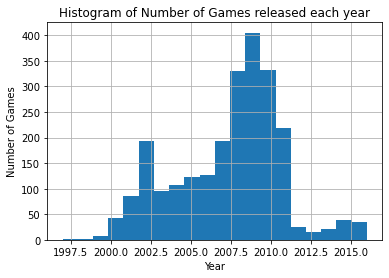

In [31]:
gms_data[gms_data['user_score']=='tbd']['year_of_release'].hist(bins=20);
plt.xlabel('Year');
plt.ylabel('Number of Games');
plt.title('Histogram of Number of Games released each year');

It's clear that the 'tbd' values are not for new games but data in the database that wasn't updated. We need to treat them the same as null values.  

In [32]:
gms_data.loc[gms_data['user_score']=='tbd','user_score']=None

In [33]:
gms_data.user_score=gms_data.user_score.astype('float')

In [34]:
gms_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16587 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16587 non-null  object 
 1   platform         16587 non-null  object 
 2   year_of_release  16587 non-null  int64  
 3   genre            16587 non-null  object 
 4   na_sales         16587 non-null  float64
 5   eu_sales         16587 non-null  float64
 6   jp_sales         16587 non-null  float64
 7   other_sales      16587 non-null  float64
 8   critic_score     8087 non-null   float64
 9   user_score       7550 non-null   float64
 10  rating           9879 non-null   object 
 11  total_sales      16587 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


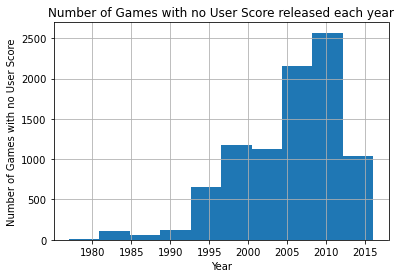

In [35]:
gms_data[gms_data['user_score'].isnull()]['year_of_release'].hist();
plt.xlabel('Year');
plt.ylabel('Number of Games with no User Score');
plt.title('Number of Games with no User Score released each year');

### Conclusion
We changed the 'tbd' value in *user_score* column to *null-value*. 
We decided to keep the null values as they are. Any change would just decrease the accuracy of our analysis.

### Fixing Rating column

In [36]:
gms_data.rating.value_counts()

E       3962
T       2936
M       1555
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

After checking out on the internet what the ratings with few games mean, we realize that most of them are obsolete and belong today into *Everyone* category. We drop AO as it has a single game and the rest we change to *E*

In [37]:
gms_data.loc[gms_data['rating'].isin(['EC','K-A','RP']),'rating']='E'

In [38]:
gms_data.drop(index=gms_data[gms_data['rating']=='AO'].index,inplace=True)

#### Conclusion
We did a lot of work to fill up missing data. The missing year of release values we filled up from the years the same game was released on other platforms or from the name of the game if it was mentioned. For several high quality games we filled the year manually.<br>
We dropped entries which had no name, or had no year and were low income.<br>
Erroneous 'to be determined' scores we changed to None. We had a big problem with the big number of user score and critic score whom are missing. There is no way to write in a score without altering the results of the analysis as there is no way you can predict the score based on the external factors that are given. On the same platform, on the same genre, on the same year you can have a great game with a score of 9.8 and bad game with a score of 3. Maybe if we had known the company that produced the game, the budget, how much time it was in production, we could have produced a score but even then it's not sure.<br>
We convert the data to the appropriate types.<br>
We added a column to contain the total sales for each game.

## Step 3. Analyze the data

Let's look at how many games were released in different years.

In [39]:
df=gms_data.groupby(by='year_of_release')['total_sales'].agg(['count','sum']).reset_index()

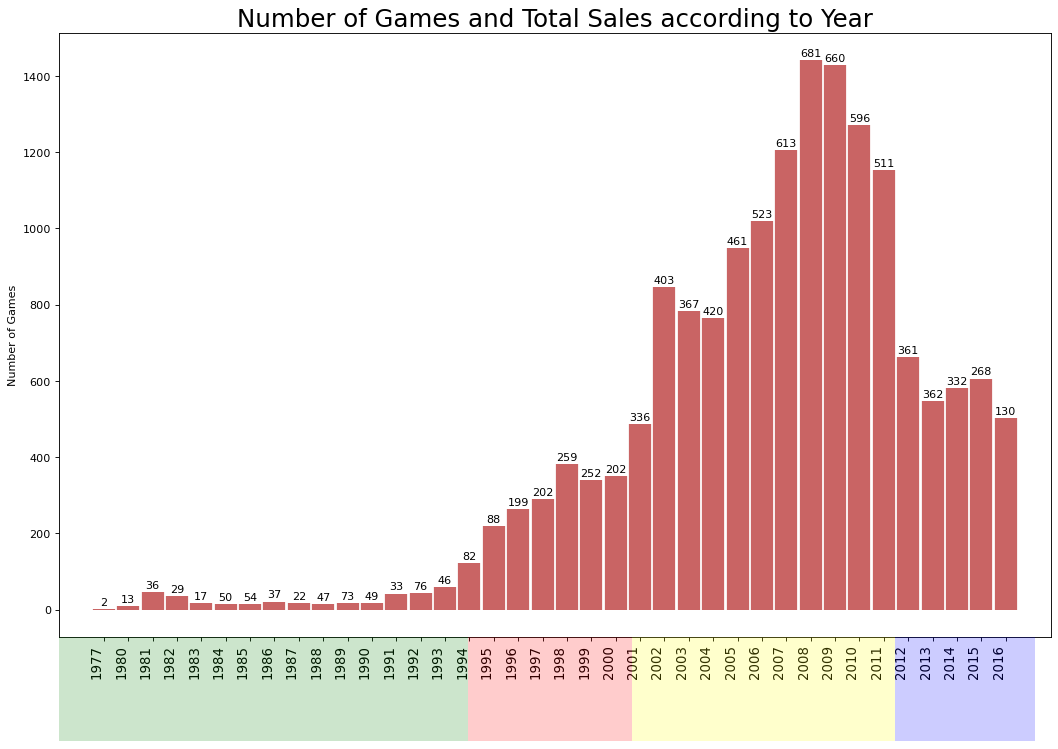

In [40]:
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df['count'], color='firebrick', alpha=0.7, linewidth=20)
# Annotate Text
for i, cty in enumerate(df['count']):
    ax.text(i, cty+10, round(df.loc[i,'sum']), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Number of Games and Total Sales according to Year', fontdict={'size':22})
ax.set(ylabel='Number of Games')
plt.xticks(df.index, df.year_of_release, rotation=90, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.125, -0.005), width=.32, height=.13, alpha=.2, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.445, -0.005), width=.128, height=.13, alpha=.2, facecolor='red', transform=fig.transFigure)
p3 = patches.Rectangle((.573, -0.005), width=.205, height=.13, alpha=.2, facecolor='yellow', transform=fig.transFigure)
p4 = patches.Rectangle((.778, -0.005), width=.11, height=.13, alpha=.2, facecolor='blue', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
fig.add_artist(p3)
fig.add_artist(p4)
plt.show()

We wrote on each year the total sales of that year on top of each column.
We see that we can identify 4 periods in game-making: 1977-1994; 1995-2000; 2001-2011 and 2012-2016. We see that the total sales roughly coresponds to the number of games produced. This is logical. The more money games make, the more producers enter the game market. Maybe we can find even a correlation between the total sales of the past year and the number of games released the next year.
On the other hand, we can have the opposite effect. The more games are made, the more people buy them and spend more money.<br>
**We have to investigate if the number of games determines how much people spend, or the spending determines how many games are produced**.

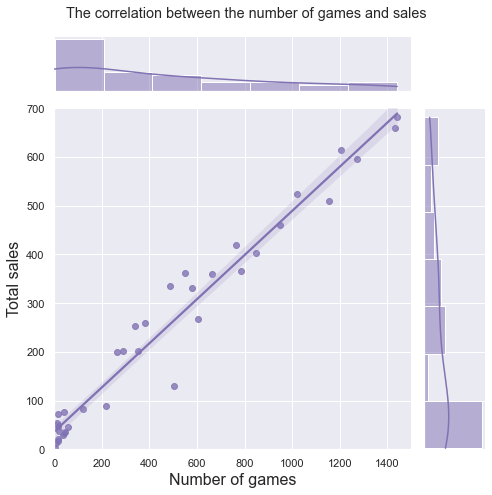

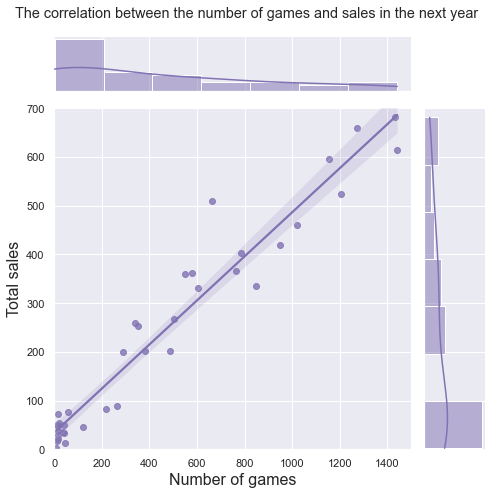

In [41]:
#we redo df since it gets the scatter plot modifies the data
df=gms_data.groupby(by='year_of_release')['total_sales'].agg(['count','sum']).reset_index()
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="count", y="sum", data=df,
                  kind="reg", truncate=True,
                  xlim=(0, 1500), ylim=(0, 700),
                  color="m", height=7)
g.set_axis_labels('Number of games', 'Total sales', fontsize=16)
g.fig.suptitle('The correlation between the number of games and sales')
# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

ef=df
ef['sum']=df['sum'].shift(1)
g = sns.jointplot(x="count", y="sum", data=ef,
                  kind="reg", truncate=True,
                  xlim=(0, 1500), ylim=(0, 700),
                  color="m", height=7)
g.set_axis_labels('Number of games', 'Total sales', fontsize=16)
g.fig.suptitle('The correlation between the number of games and sales in the next year')
plt.tight_layout()


Amazing, our guess was correct. There seems to be a very strong correlation between the number of games and the income they bring. Let's see the actual numbers

In [42]:
#we redo df since it gets the scatter plot modifies the data
df=gms_data.groupby(by='year_of_release')['total_sales'].agg(['count','sum']).reset_index()
print("The correlation between the number of games and the total sales is", df['sum'].corr(df['count']))
print("The correlation between the total sales and the number of games released in the next year is",  df['count'].shift(-1).corr(df['sum']))
print("The correlation between the total sales and number of games released two years from now",  df['count'].shift(-2).corr(df['sum']))

The correlation between the number of games and the total sales is 0.9817956350212174
The correlation between the total sales and the number of games released in the next year is 0.9711223552462277
The correlation between the total sales and number of games released two years from now 0.9086841512828977


Wow, 0.98 correlation is extremely strong. <br>
On one hand it makes sense that if sales are strong, then more developers will work into developing games and more games will appear on the market.<br>
On the other hand, a game's development takes at least a year if not (much) more. So **it is very surprising that when we check the corelation between sales and the number of games released in the next year, the correlation decreases**. The only explanation I can think of is that the sales represents the money the game brought over it's entire lifespan, not only in the release year. So the sum in total sales comes from a few years after the release_year; there is a built-in shift in this data.

In [43]:
gms_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
714,God of War: Ascension,PS3,2013,Action,1.23,0.63,0.04,0.35,80.0,7.5,M,2.25
11104,World Championship Games: A Track & Field Event,DS,2008,Sports,0.08,0.00,0.00,0.01,NaN,NaN,NaN,0.09
6437,Battle of Giants: Mutant Insects,DS,2010,Strategy,0.09,0.14,0.00,0.03,NaN,NaN,E10+,0.26
5200,Saban's Power Rangers: Lightspeed Rescue,N64,2000,Action,0.29,0.06,0.00,0.00,NaN,NaN,NaN,0.35
12043,G-Saviour,PS2,2000,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN,0.07


In [44]:
#create a color gradent function to be used in the colormap parameter
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)

<Figure size 1280x800 with 0 Axes>

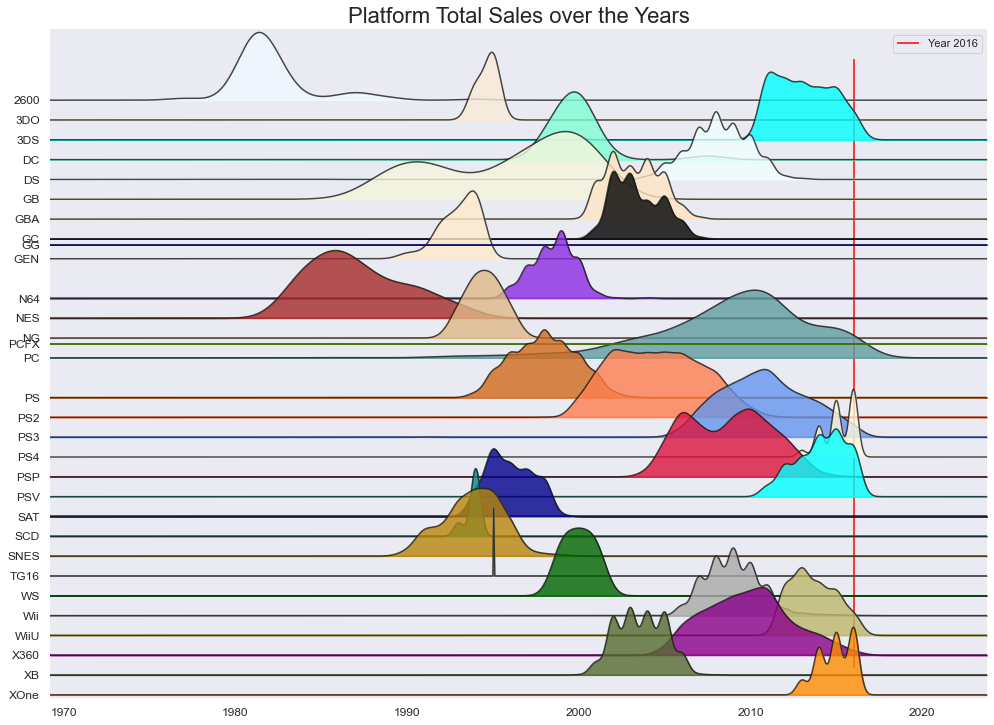

In [45]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80);
#mycolors = [plt.cm.tab20(i/float(len(df['platform'].unique())-1)) for i in range(len(df['platform'].unique()))]
fig, axes = joypy.joyplot(gms_data, column=['year_of_release'],
                          by='platform', ylim='own', figsize=(14,10), alpha=0.8, 
                          color=list(plt.cm.colors.cnames.keys()),
                          bins=10
                         );
plt.vlines(x=2016,ymin=0,ymax=10,alpha=1,color='red',label='Year 2016');
plt.legend()
# Decoration
plt.title('Platform Total Sales over the Years', fontsize=22);
plt.show();

This graph is not as explicit as I intended. <br>
We see though clearly that **each platform (except the PC) has a very limited life-span**. The gaming consoles get old relatively fast and after a few years their hardware is too old to run newer games.
<br>
Let's try to see a different visualisation of the same data.

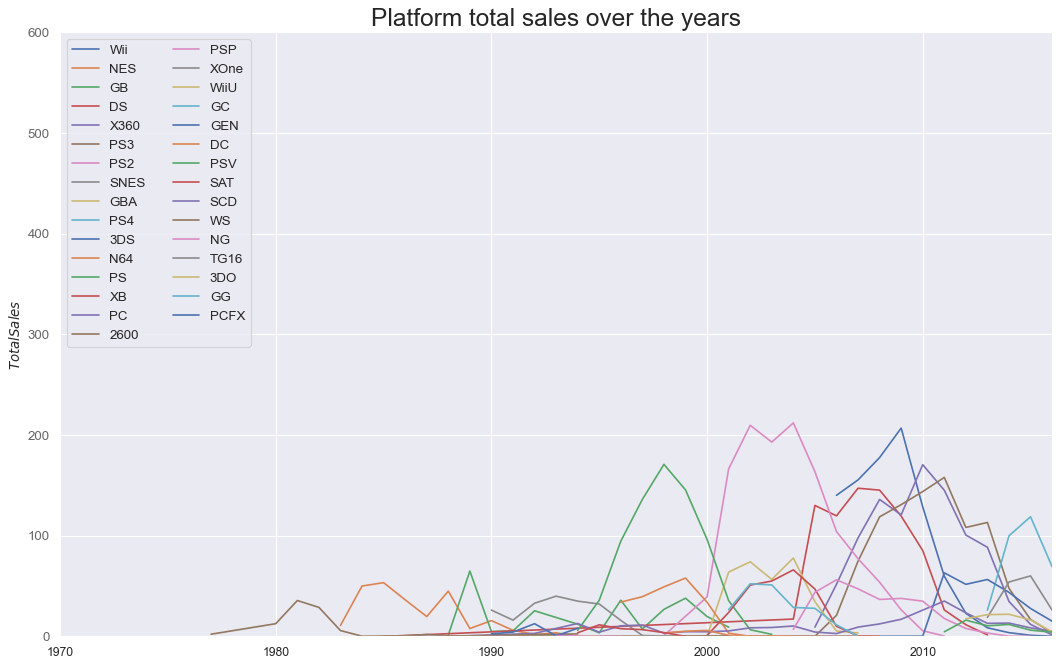

In [46]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
df=gms_data.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
for i, y in enumerate(gms_data.platform.unique()):
    plt.plot('year_of_release', 'total_sales', data=df.loc[df.platform==y, :],
                                                 #    color=mycolors[i],
                                                 label=y)
#    plt.text(df.loc[df.platform==y, :].shape[0]-.9, df.loc[df.platform==y,'total_sales'][-1:].values[0],y, fontsize=12,# color=mycolors[i])
# Decoration
plt.ylim(0,600)
plt.xlim(1970, 2016)
plt.ylabel('$Total Sales$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Platform total sales over the years", fontsize=22)
#plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend(loc='upper left', ncol=2, fontsize=12)
plt.show()

Ok, this is even worse.

In [47]:
def get_color(i):
    mycolors = list(plt.cm.colors.cnames.keys())
    return mycolors[i%len(mycolors)]

In [48]:
platforms_data=gms_data.groupby(['platform']).agg({'year_of_release':[np.min,np.mean,np.max],
                                                  'name':len,
                                                  'na_sales':sum,
                                                  'eu_sales':sum,
                                                  'jp_sales':sum,
                                                  'other_sales':sum,
                                                  'total_sales':sum,                                                  
                                                   'critic_score':np.median,
                                                   'user_score':np.median,
                                                   'year_of_release':[np.min,np.mean,np.max]
                                                  })
platforms_data.year_of_release=np.round(platforms_data.year_of_release)
platforms_data.columns= ['year_of_release_min',
                         'year_of_release_mean',
                         'year_of_release_max',
                         'number_of_games',
                         'na_sales','eu_sales','jp_sales','other_sales','total_sales',
                         'critic_score','user_score']
platforms_data.sample(5)

,year_of_release_min,year_of_release_mean,year_of_release_max,number_of_games,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
platform,,,,,,,,,,,
PSV,2011.0,2014.0,2016.0,429,12.47,13.07,21.84,6.43,53.81,71.0,7.6
SAT,1994.0,1996.0,1999.0,173,0.72,0.54,32.26,0.07,33.59,NaN,NaN
PS3,1991.0,2011.0,2016.0,1322,392.74,329.51,80.15,135.37,937.77,73.0,7.1
PS4,2013.0,2015.0,2016.0,392,108.74,141.09,15.96,48.35,314.14,73.0,7.0
PC,1985.0,2009.0,2016.0,970,94.23,142.16,0.17,22.30,258.86,78.0,7.5


In order to determine which platforms will be succesful next year, we obviously need to pick from the active platforms.  But the historical data is still important for the analysis, even if it doesn't impact directly our research. 
<br>
We decided that instead of picking a date and droping older data, we will drop all the platforms who are no longer active in 2016. **The old platforms will certainly won't have new games made for them**. So we just pick the platforms with a positive income in 2016. 
<br>
We will still use the old, complete data in the graphs that don't require a reduced quantity of data.

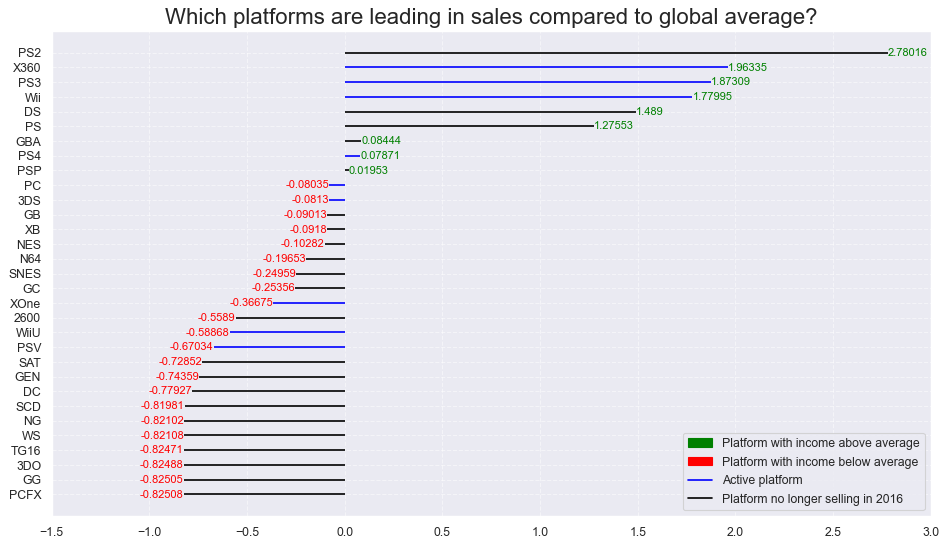

In [49]:
active_platforms_data=platforms_data
#I am coloring with blue platforms that have new games coming in 2016 and with black old platforms that are no longer active
active_platforms_data['active']=['blue' if x==2016 else 'black' for x in active_platforms_data.year_of_release_max]

x = active_platforms_data.loc[:, ['total_sales']]
active_platforms_data['z_sales']= (x - x.mean())/x.std()
active_platforms_data.sort_values('z_sales', inplace=True)

# Draw plot
plt.figure(figsize=(12,7), dpi= 80)
plt.hlines(y=active_platforms_data.index, xmin=0, xmax=active_platforms_data.z_sales,
            colors=active_platforms_data.active)
for x, y, tex in zip(active_platforms_data.z_sales, active_platforms_data.index, active_platforms_data.z_sales):
    t = plt.text(x, y, round(tex, 5), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})

# Decorations    
plt.title('Which platforms are leading in sales compared to global average?', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.xlim(-1.5, 3)
plt.tight_layout()
handles, labels = ax.get_legend_handles_labels()
red_patch = patches.Patch(color='red', label='Platform with income below average')
blue_line = Line2D([0], [0],color='blue', label='Active platform')
black_line = Line2D([0], [0],color='black', label='Platform no longer selling in 2016')
green_patch = patches.Patch(color='green', label='Platform with income above average')
plt.legend(handles=[green_patch,red_patch, blue_line,black_line], loc='lower right')
plt.show()

We notice something interesting. While the difference between the bottom platforms is quite low, the top platforms are massively ahead of the average. PS2 has 2.7 times the average income, X360 is almost twice the average. This is explained by the following fact: The type of platform the user severly buys limits the games he is able to play on it. Because of this, **a user will only buyt the most succesful platform with the most number of games**. This leads to a very top-heavy market where there are few succesful platforms which take over the whole market. <br>
Let's check this understanding on the US market:

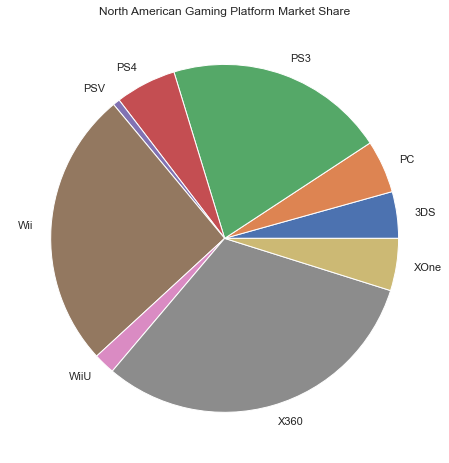

In [50]:
active_platforms_data[active_platforms_data['active']=='blue'].groupby('platform')['na_sales'].sum().plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("North American Gaming Platform Market Share")
plt.ylabel("")
plt.show()

As we suspected, the three biggest platforms take almost 75% of the market.

In [51]:
active_platforms_data

,year_of_release_min,year_of_release_mean,year_of_release_max,number_of_games,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,active,z_sales
platform,,,,,,,,,,,,,
PCFX,1996.0,1996.0,1996.0,1,0.00,0.00,0.03,0.00,0.03,NaN,NaN,black,-0.825080
GG,1992.0,1992.0,1992.0,1,0.00,0.00,0.04,0.00,0.04,NaN,NaN,black,-0.825051
3DO,1994.0,1995.0,1995.0,3,0.00,0.00,0.10,0.00,0.10,NaN,NaN,black,-0.824878
TG16,1995.0,1995.0,1995.0,2,0.00,0.00,0.16,0.00,0.16,NaN,NaN,black,-0.824706
WS,1999.0,2000.0,2001.0,6,0.00,0.00,1.42,0.00,1.42,NaN,NaN,black,-0.821080
NG,1993.0,1994.0,1996.0,12,0.00,0.00,1.44,0.00,1.44,NaN,NaN,black,-0.821023
SCD,1993.0,1994.0,1994.0,6,1.00,0.36,0.45,0.05,1.86,NaN,NaN,black,-0.819814
DC,1998.0,2000.0,2008.0,52,5.43,1.69,8.56,0.27,15.95,88.0,8.8,black,-0.779273
GEN,1990.0,1993.0,1994.0,27,19.27,5.52,2.67,0.89,28.35,NaN,NaN,black,-0.743594


Let's check the global sales of all the new games, broken down by platforms active in 2016.

In [52]:
#We take only platforms that are active now
active_platforms_data=platforms_data[platforms_data['year_of_release_max']==2016].reset_index()
#Now we take all the games made for the active platforms
gms_data_active_platforms=gms_data.query("platform in @active_platforms_data.platform")

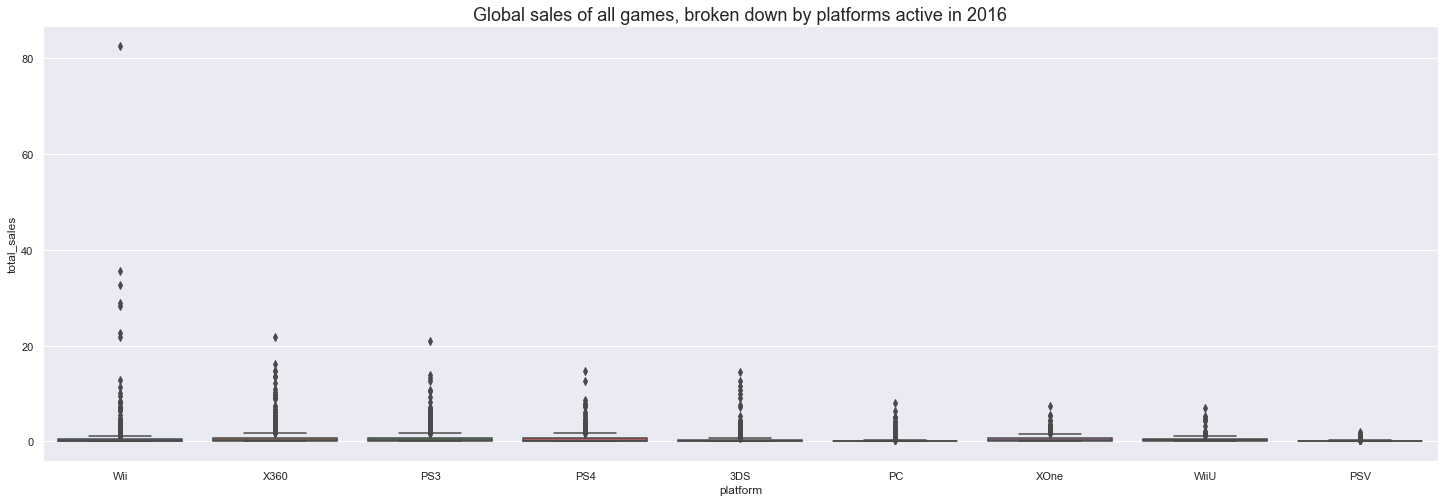

In [53]:
#We take only platforms that are active now
sns.set(rc={"figure.figsize":(25, 8)})
plt.title("Global sales of all games, broken down by platforms active in 2016", size=18)
sns.boxplot(y='total_sales', x='platform',
                 data=gms_data_active_platforms
           );

Because of the Wii outliers we can't see anything in this graph.But we don't want to remove these outliers. **There is no reason to belive the data is bad**. Wii just had a great marketing campaign at launch and did a lot of sales with several games. **A solution is to use a logharitmic scale**.

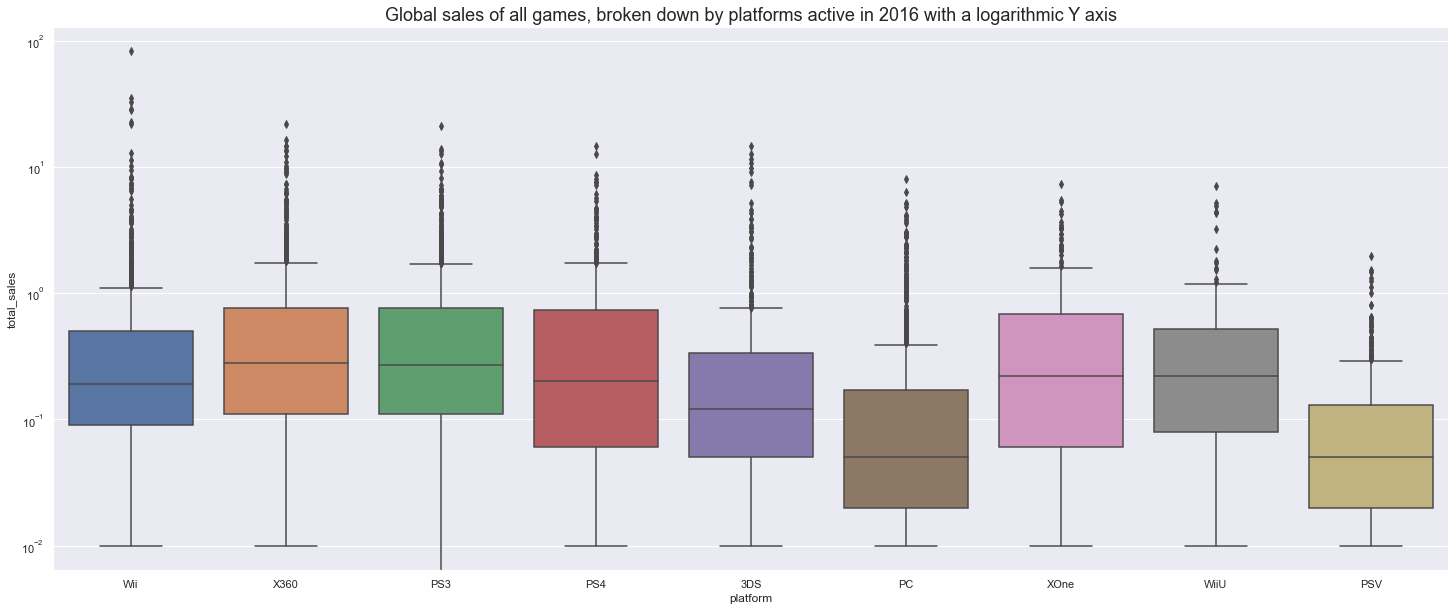

In [54]:
#We take only platforms that are active now
sns.set(rc={"figure.figsize":(25, 10)})
plt.title("Global sales of all games, broken down by platforms active in 2016 with a logarithmic Y axis", size=18)
plt.yscale('log')
sns.boxplot(y='total_sales', x='platform',
                 data=gms_data_active_platforms
           );

We see that the PC has the lowest average sales. But this is a bit misleading since the PC has been around for a long time, including in time periods where sales were low compared to current levels, and this affects the sale distribution. So we have to limit our data also in time.<br>

What is the median life span of a platform? Let's take all the dead platforms and see their lifespan

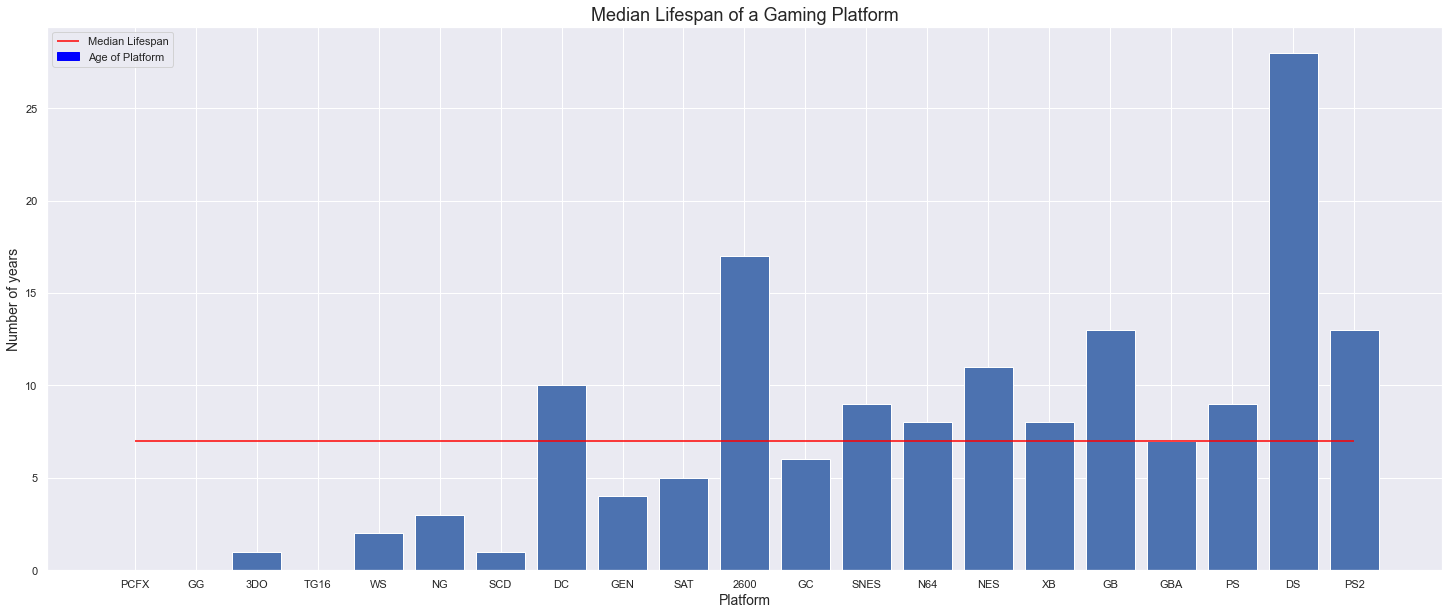

Median Lifespan of a Gaming Platform is  7.0  years.


In [55]:
#I define 'dead' platform as a platform who didn't get any new game in the past 3 years
dead_platforms_data=platforms_data.query('year_of_release_max<2014').reset_index()
dead_platforms_data['lifespan']=dead_platforms_data['year_of_release_max']-dead_platforms_data['year_of_release_min']
#bar plot
plt.bar(dead_platforms_data['platform'],dead_platforms_data['lifespan'])
#median line
med_lifespan=dead_platforms_data['lifespan'].median()
plt.hlines(med_lifespan,xmin=0,xmax='PS2',colors='red',label='Median Lifespan')
#decorations
plt.ylabel('Number of years', size=14)
plt.xlabel('Platform', size=14)
plt.title('Median Lifespan of a Gaming Platform', size=18)
blue_patch = patches.Patch(color='blue', label='Age of Platform')
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(blue_patch)
plt.legend(handles=handles,loc='upper left')
plt.show()
print('Median Lifespan of a Gaming Platform is ',med_lifespan,' years.')

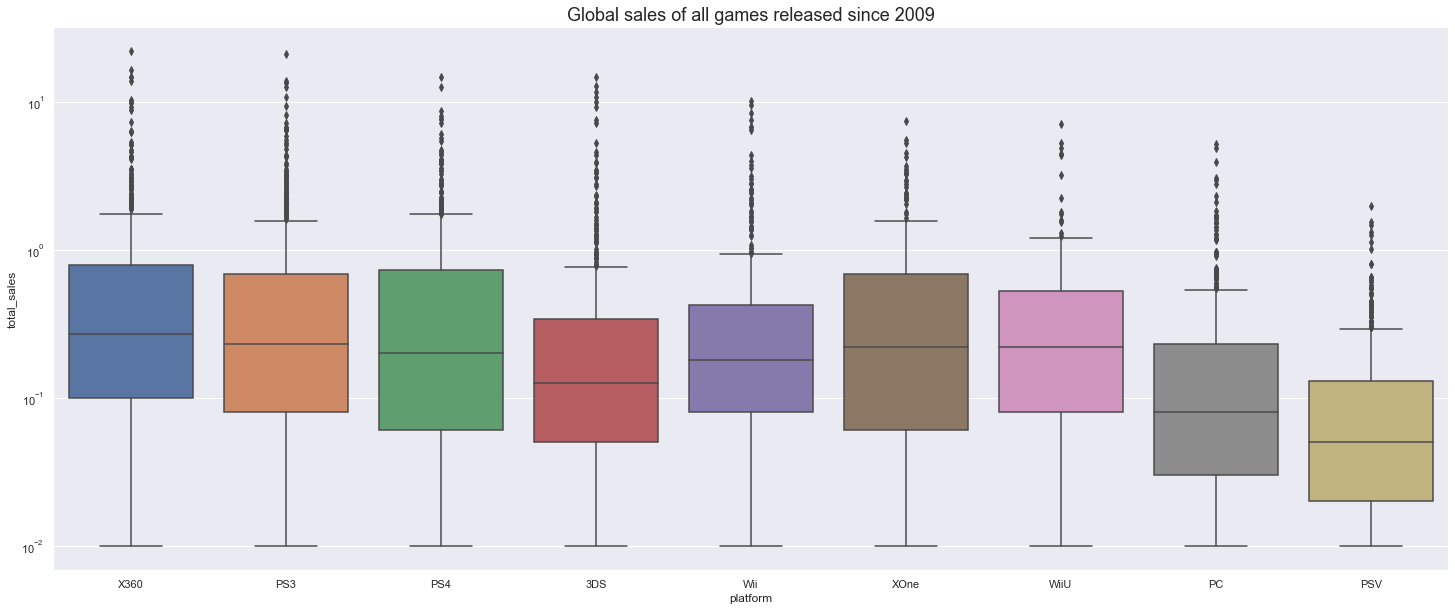

In [56]:
#We take only platforms that are active now
sns.set(rc={"figure.figsize":(25, 10)})
#we compute the data authomatically based on the result from last step
plt.title("Global sales of all games released since "+str(2016-int(med_lifespan)), size=18)
plt.yscale('log')
sns.boxplot(y='total_sales', x='platform',
                 data=gms_data_active_platforms[gms_data_active_platforms['year_of_release']>2016-int(med_lifespan)]
           );

We see that X360, PS3, PS4, XOne and WiiU have relatively similar average sales.

Let's take one gaming platform and see how user and professional reviews affect sales. I choose the PC as it is the one with most number of games and the longest enduring platform.

<img src='https://www.e-blog365.com/wp-content/uploads/2020/05/Gaming-PCs.jpg'>

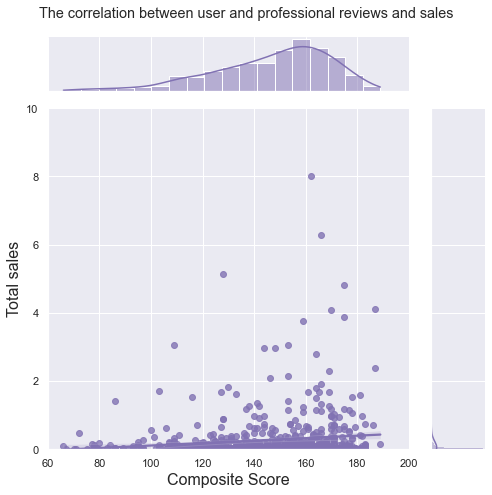

In [57]:
pc_game_data=gms_data[gms_data['platform']=='PC']
pc_game_data['composite_score']=pc_game_data['critic_score']+(10*pc_game_data['user_score'])

#df=gms_data.groupby(by='year_of_release')['total_sales'].agg(['count','sum']).reset_index()
sns.set_theme(style="darkgrid")
g = sns.jointplot(x="composite_score", y="total_sales", data=pc_game_data,
                  kind="reg", truncate=True,
                  xlim=(60, 200), ylim=(0, 10),
                  color="m", height=7)
g.set_axis_labels('Composite Score', 'Total sales', fontsize=16)
g.fig.suptitle('The correlation between user and professional reviews and sales')
# labels appear outside of plot area, so auto-adjust
plt.tight_layout()

It seems there is no correlation between the score of a game and how high it's sales are. Let's check this.

In [58]:
print("The correlation between the total sales of a game and the composite score is",
      pc_game_data['total_sales'].corr(pc_game_data['composite_score']))
print("The correlation between the total sales of a game and the user score is",
      pc_game_data['total_sales'].corr(pc_game_data['user_score']))
print("The correlation between the total sales of a game and the critic score is",
      pc_game_data['total_sales'].corr(pc_game_data['critic_score']))


The correlation between the total sales of a game and the composite score is 0.12309492949954899
The correlation between the total sales of a game and the user score is 0.009851935575356257
The correlation between the total sales of a game and the critic score is 0.2572069476112259


We see that indeed, the correlation between the score of a game and it's sales is pretty low. **It's interesting that the correlation with the critic score it's much higher than that with the user score**. I suppose that the **users are more biased**, and the more biased a user, the more likely is he will bother giving a score which will be either too high or too low according to his bias.

Let's compare now how the sales of the same game is on other platforms. Let's take the titles which have at least 4 platforms. We'll take the 10 with most income.

In [59]:
#group the games based on the name
multi_platform_games=gms_data.groupby('name').count() 
#drop all the games which have less than 4 platforms and select the names of those who are left
multi_platform_games=multi_platform_games.drop(multi_platform_games[multi_platform_games['platform']<4].index).index
#select the name of the top 10 games with the highest sales
top_multi_platform_games=gms_data.query('name in @multi_platform_games').groupby('name').sum().\
            sort_values(by='total_sales',ascending=False).head(10).index
top_multi_platform_games

Index(['Grand Theft Auto V', 'Call of Duty: Black Ops',
       'Call of Duty: Modern Warfare 3', 'Call of Duty: Black Ops II',
       'Call of Duty: Ghosts', 'Call of Duty: Black Ops 3', 'Minecraft',
       'Call of Duty: Advanced Warfare', 'The Elder Scrolls V: Skyrim',
       'Call of Duty 4: Modern Warfare'],
      dtype='object', name='name')

These are the 10 games with the biggest income according to our Data Base. Wow, Call of Duty is really present

<img src='https://i.ytimg.com/vi/9CGaHjrGCYU/maxresdefault.jpg'>

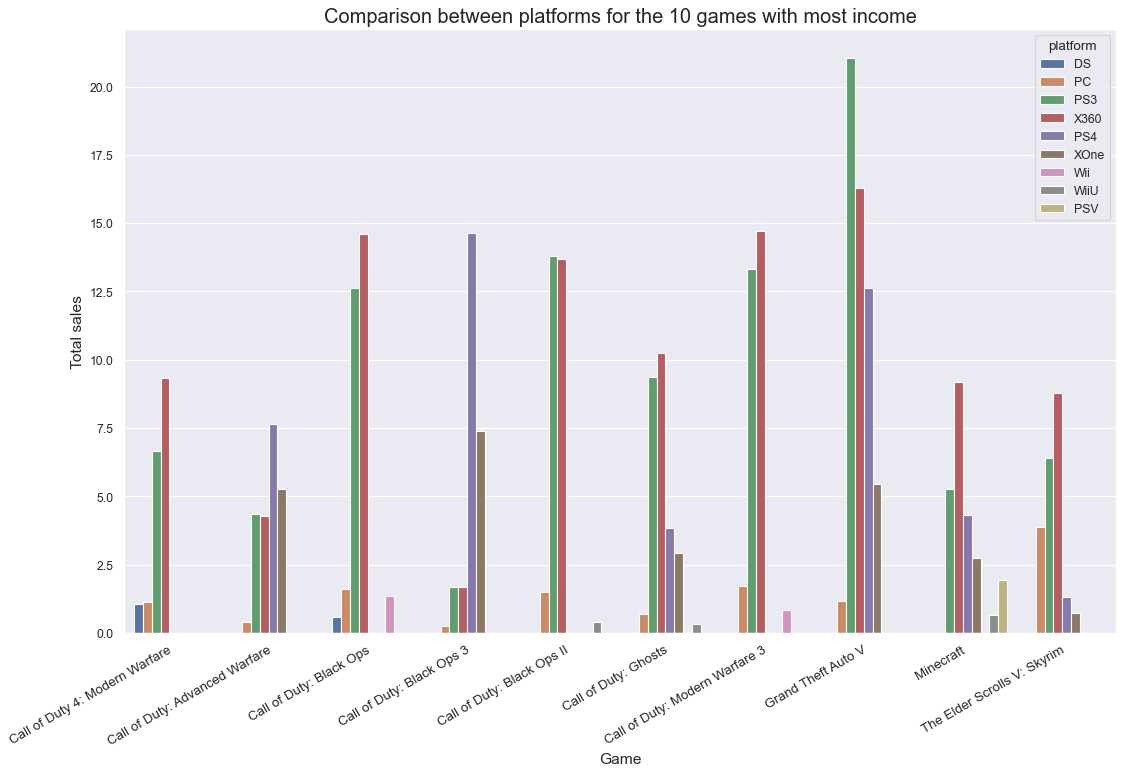

In [60]:
platform_comparison=gms_data.query('name in @top_multi_platform_games').\
            groupby(['name','platform'])['total_sales'].sum().reset_index()
plt.figure(figsize=(16,10), dpi= 80)
g=sns.barplot(x="name",
           y="total_sales",
           hue="platform",
           data=platform_comparison);
plt.xlabel('Game', fontsize=14)
plt.ylabel('Total sales', fontsize=14)
plt.title('Comparison between platforms for the 10 games with most income', fontsize=18)
plt.xticks( rotation=30, horizontalalignment='right', fontsize=12);

Let's take the titles which have at least 4 platforms. We'll take the 10 with most income.

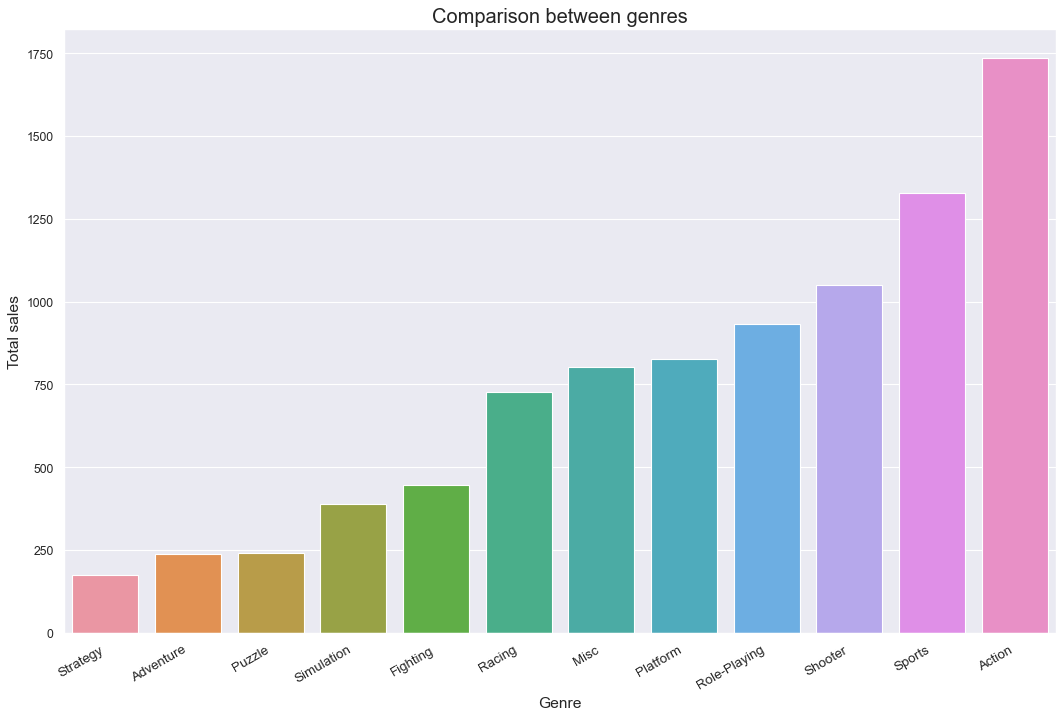

In [61]:
platform_comparison=gms_data.groupby(['genre'])['total_sales'].sum().reset_index().sort_values('total_sales')
plt.figure(figsize=(16,10), dpi= 80)
g=sns.barplot(x="genre",
           y="total_sales",
           data=platform_comparison);
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Total sales', fontsize=14)
plt.title('Comparison between genres', fontsize=18)
plt.xticks( rotation=30, horizontalalignment='right', fontsize=12);

It seems the most profitable genres are Action and Sports, and the least profitable are Strategy and Adventure. Strategy and Adventure are games designed for celebral gamers, which are ready to sit for hours to solve a problem. Sports and Action games are designed more for gamers who want shorter gaming sessions filled with adrenaline.

## Step 4. Create a user profile for each region

Let's determine for each region (NA, EU, JP) :
•	The top five platforms. Describe variations in their market shares from region to region.
•	The top five genres. Explain the difference.
•	Do ESRB ratings affect sales in individual regions?

In [62]:
#smart function that prepares for data for a variety of cases: best ratings/best platforms/best genres in specified region
def best_db(db,region):
    my_platform_comparison=gms_data.groupby(db)[region].\
                    sum().reset_index().sort_values(region, ascending=False).\
                    head(5)
    return my_platform_comparison

regions={'na_sales':'North America','eu_sales':'Europe','jp_sales':'Japan'}

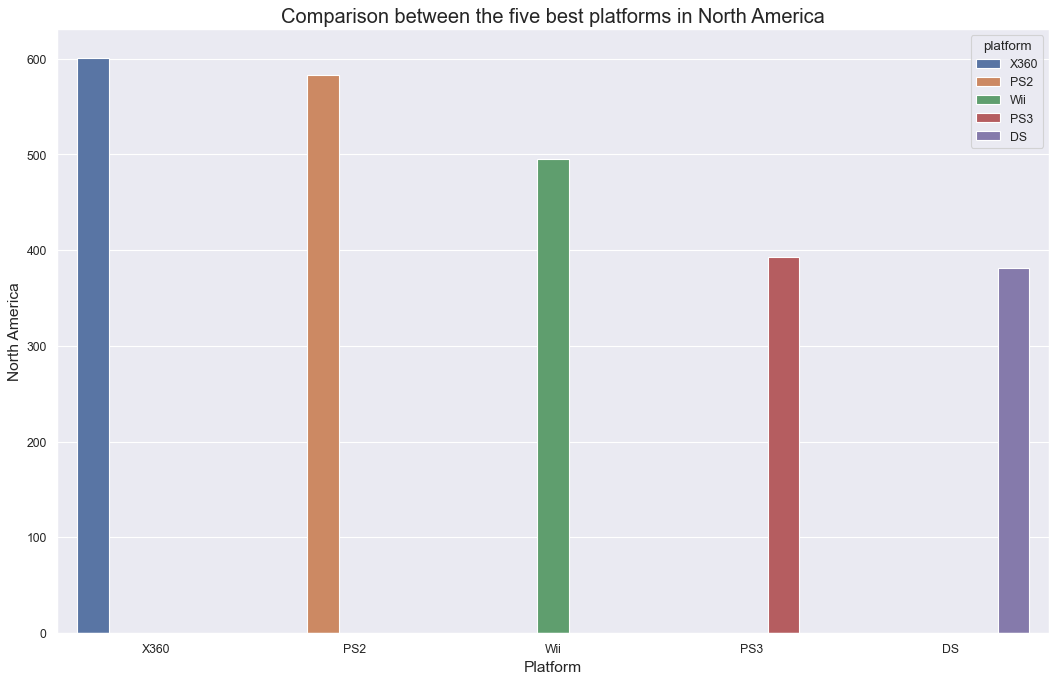

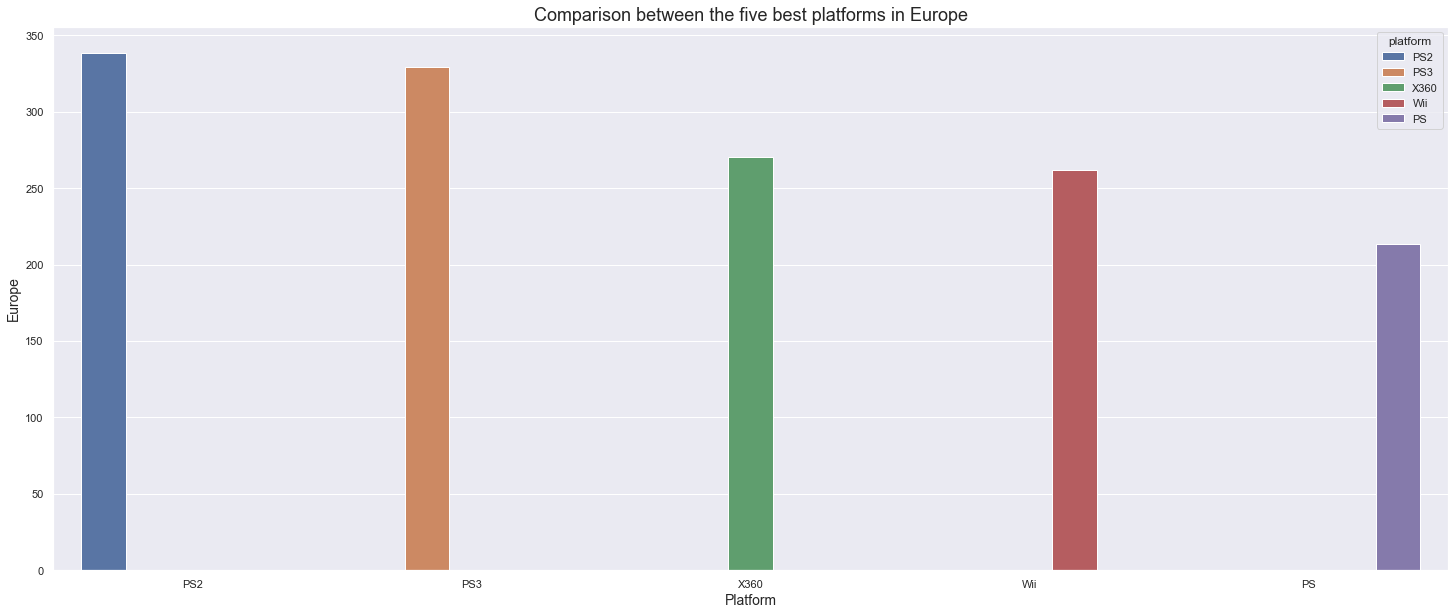

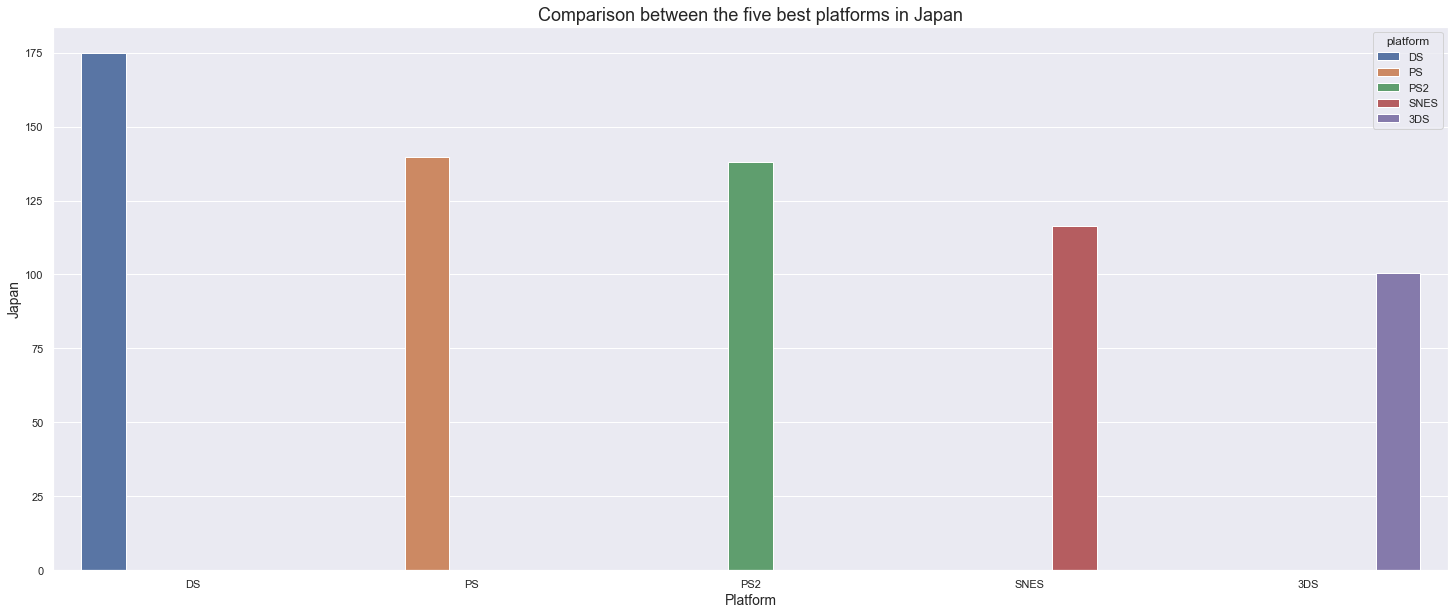

In [63]:
plt.figure(figsize=(16,10), dpi= 80)
for sales in regions:
    g=sns.barplot(x='platform',
               y=sales,
               hue="platform",
               data=best_db('platform',sales));
    plt.xlabel('Platform', fontsize=14)
    plt.ylabel(regions[sales], fontsize=14)
    plt.title('Comparison between the five best platforms in '+regions[sales], fontsize=18)
    plt.show()

We see the results are pretty similar in North America and Europe, but quite different from those in Japan. **Japan has quite a different culture than the West, and it has a strong local gaming culture**. Japanese developers make games that are designed exclusively to the Japanese market, many times they don't bother to even make translations to English. DS, SNES and 3DS are Japanese gaming consoles which are very succesfull in Japan but less so in the West.
**It's remarkable that DS and 3DS are handheld gaming platforms which can be taken and played everywhere**, while all the others are imobile and need a big screen to play. **This might point out to a fundamental difference between Japanese gamers and Western ones**.

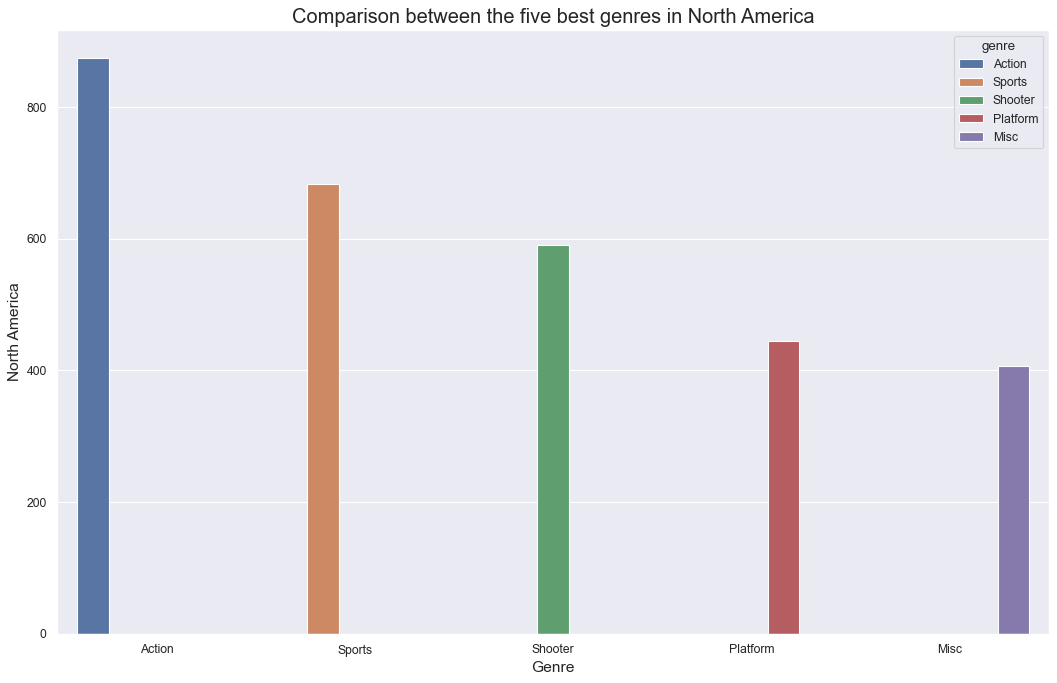

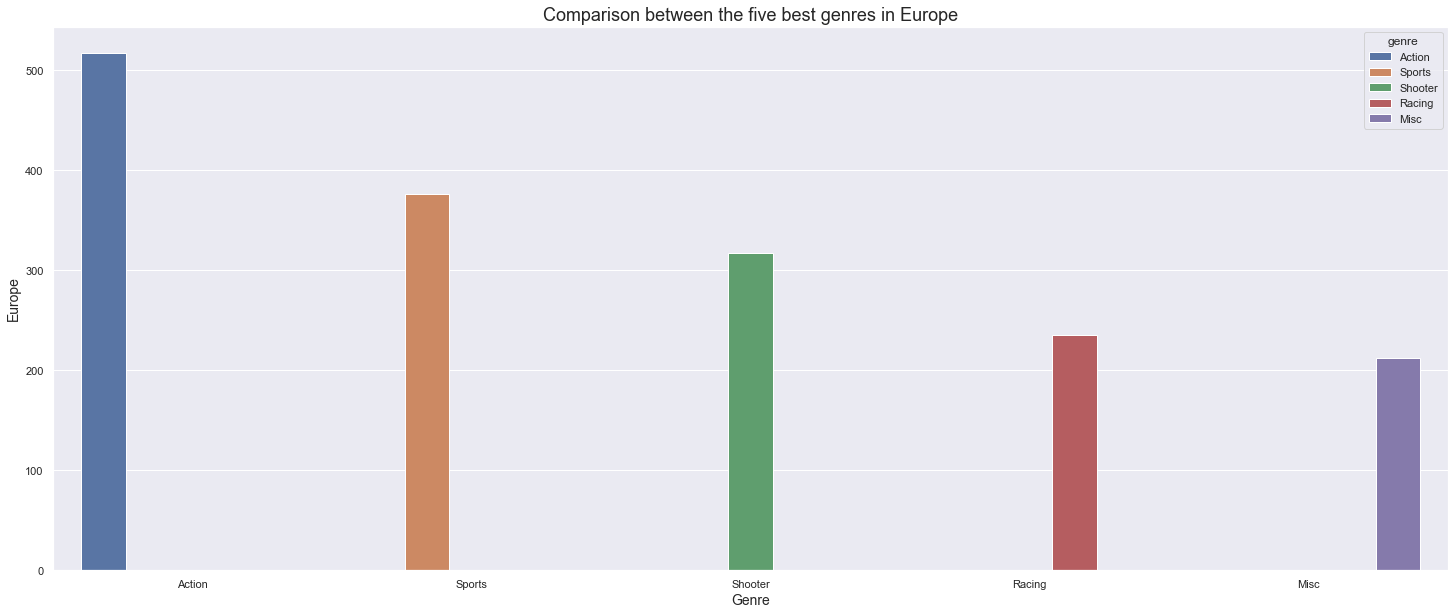

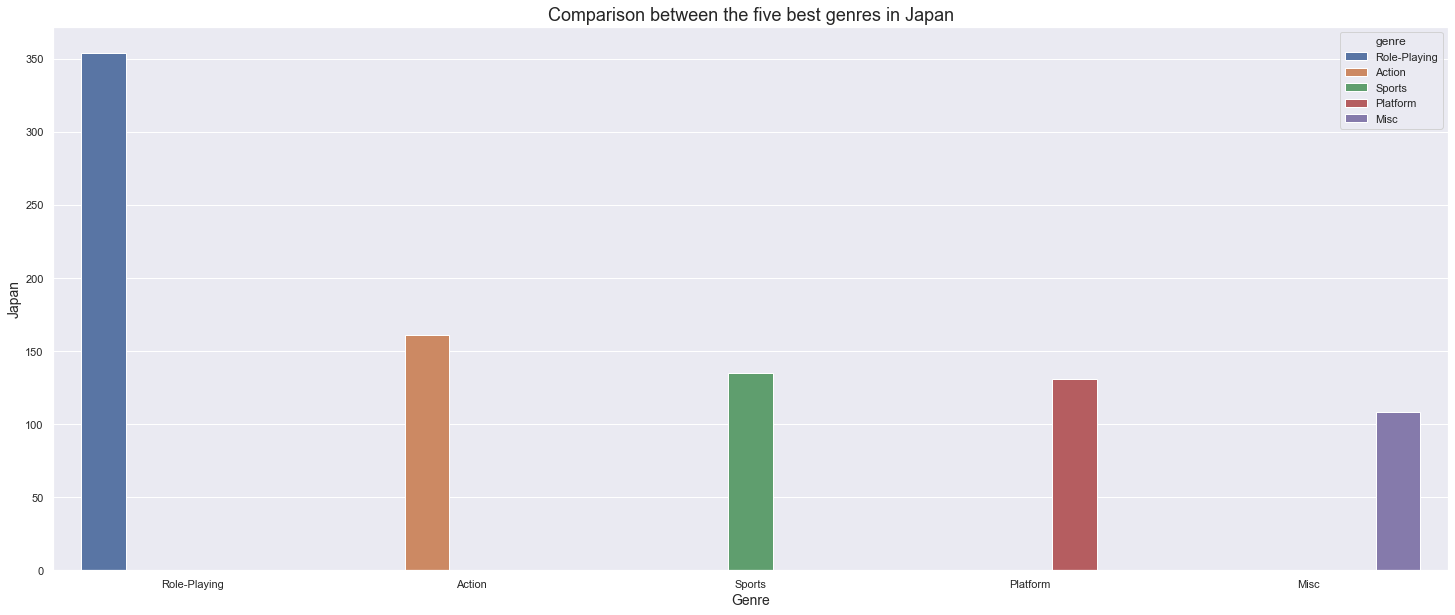

In [64]:
plt.figure(figsize=(16,10), dpi= 80)
for sales in regions:
    g=sns.barplot(x='genre',
               y=sales,
               hue="genre",
               data=best_db('genre',sales));
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel(regions[sales], fontsize=14)
    plt.title('Comparison between the five best genres in '+regions[sales], fontsize=18)
    plt.show()

Again, pretty similar results in North America and Europe, with Action game in the first place while in Japan on the first place we have Role-Playing games. But it's worth noting that Japanese Role-Playing games are more Action-oriented  that the western role-playing games.

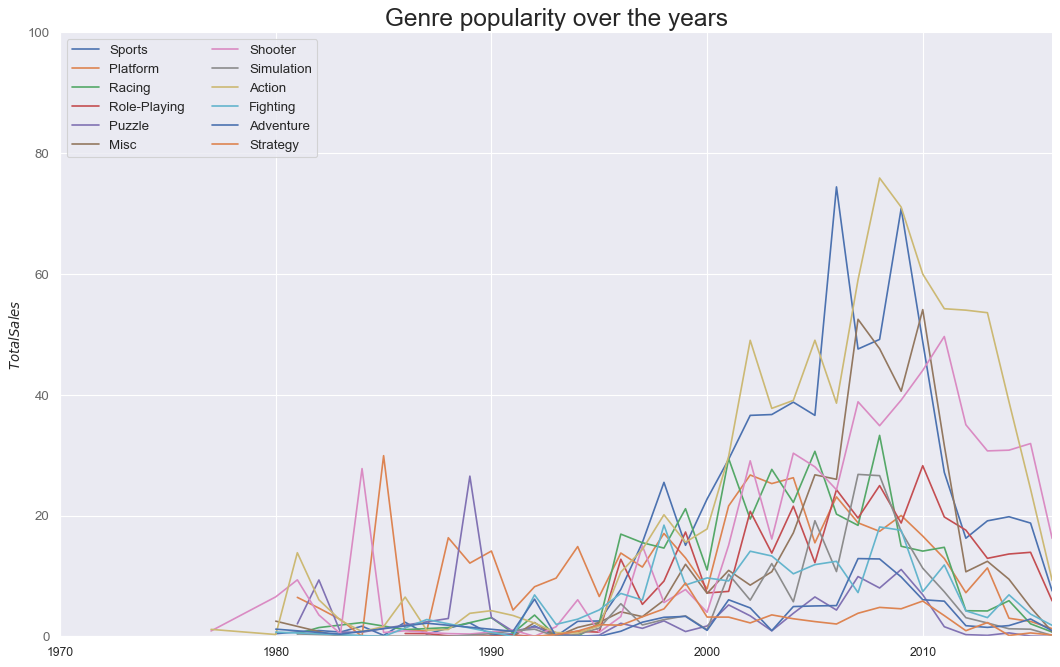

In [65]:
# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
df=gms_data.groupby(['genre','year_of_release'])['na_sales'].sum().reset_index()
for i, y in enumerate(gms_data.genre.unique()):
    plt.plot('year_of_release', 'na_sales', data=df.loc[df.genre==y, :],
                                                 label=y)
# Decoration
plt.ylim(0,100)
plt.xlim(1970, 2016)
plt.ylabel('$Total Sales$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Genre popularity over the years", fontsize=22)
#plt.grid(axis='y', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.legend(loc='upper left', ncol=2, fontsize=12)
plt.show()

We see in the graph that heavy games like strategy were more popular in the 1990s, to be overtaken by action games.

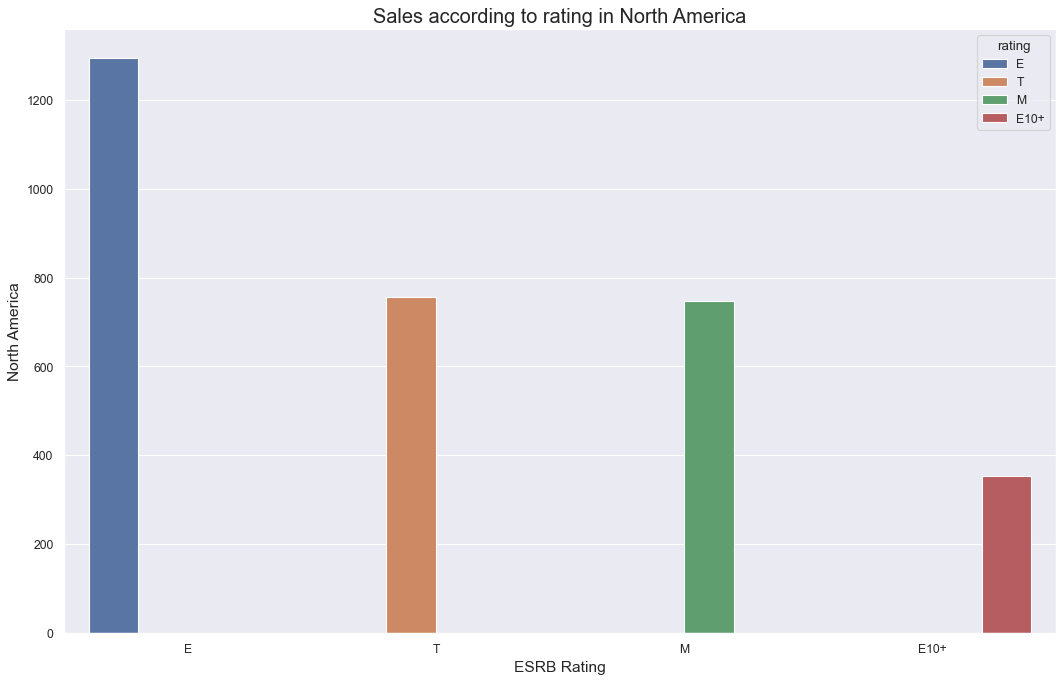

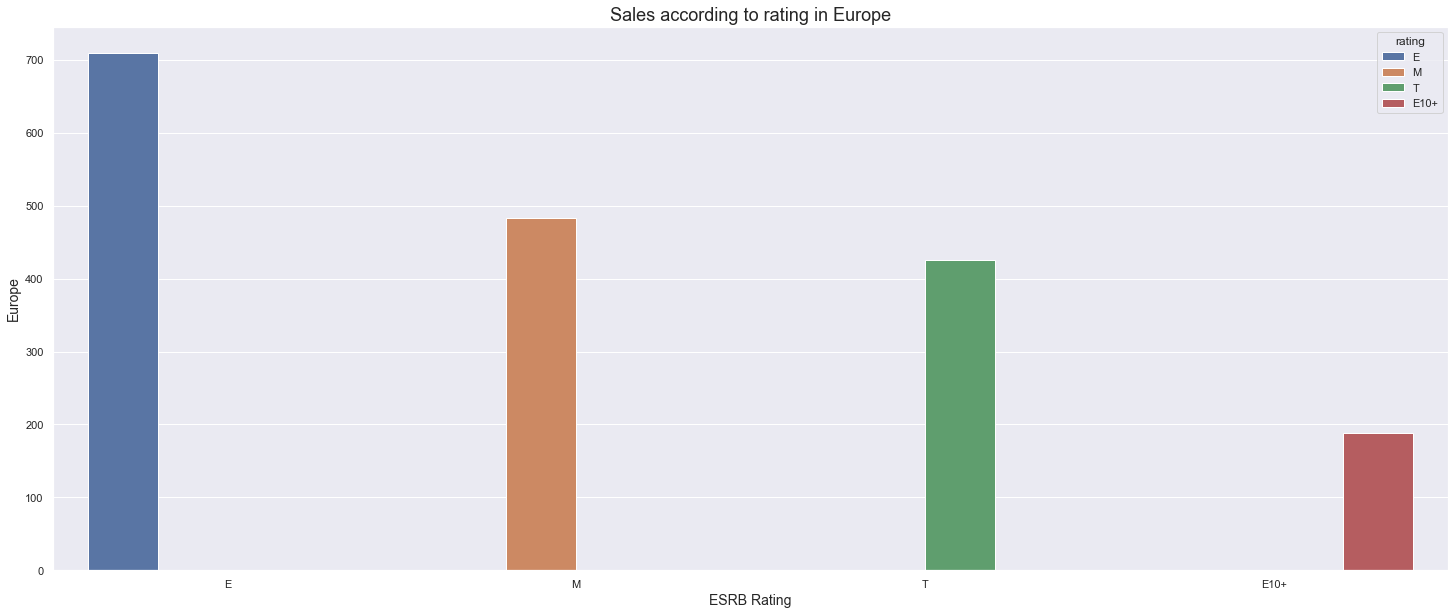

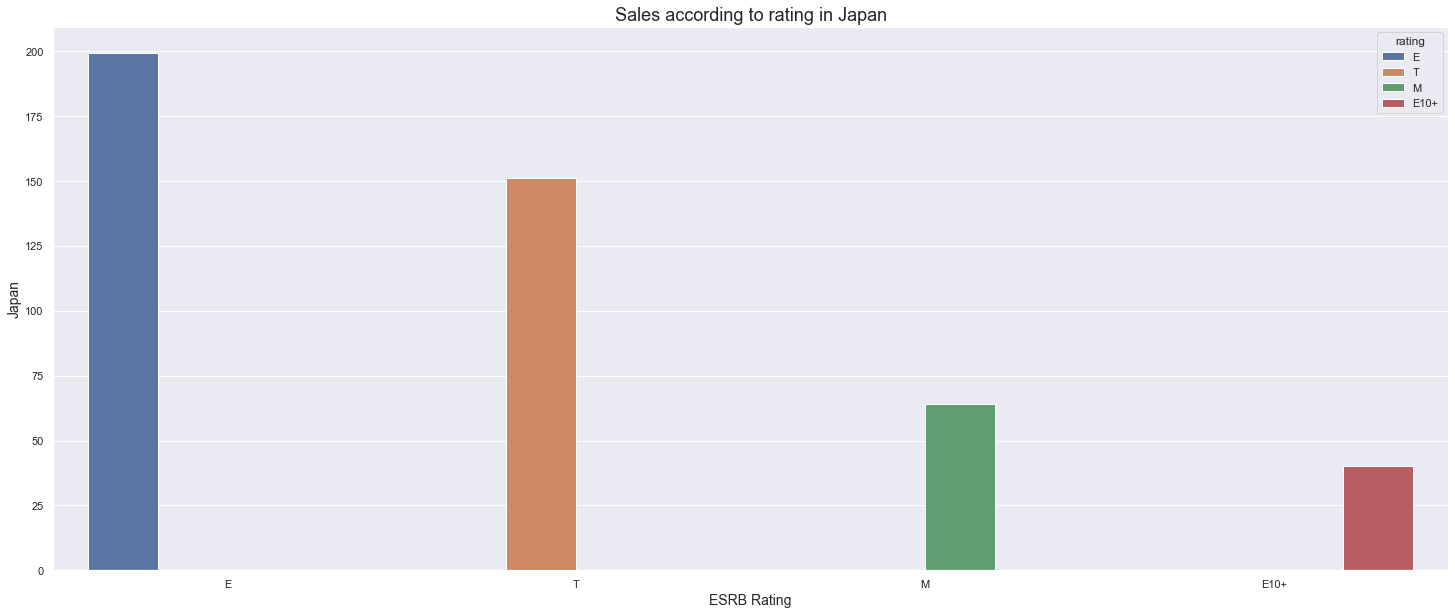

In [66]:
plt.figure(figsize=(16,10), dpi= 80)
for sales in regions:
    g=sns.barplot(x='rating',
               y=sales,
               hue="rating",
               data=best_db('rating',sales));
    plt.xlabel('ESRB Rating', fontsize=14)
    plt.ylabel(regions[sales], fontsize=14)
    plt.title('Sales according to rating in '+regions[sales], fontsize=18)
    plt.show()

Pretty similar results across the regions. In Japan, Mature (violent) games have relatively lower popularity than in the West.

### Conclusions
The average gamer in the North America and Europe is into fast, immersive action paced games, while in Japan gamers tend to like more roleplaying games in which their character is part of a developing story and play on the move.

## Step 5. Test the following hypotheses:

We want a confidence probabilty of 95%. We calculate the alpha level:
$$ \alpha = 1-0,95\% = 0.5\% $$

We use the folowing function for the test:

In [67]:
def hypotesis(alpha,data1,data2,eq_var):
    results = st.ttest_ind(data1,data2, 
        equal_var = eq_var)

    print('p-value: {:.18f}'.format(results.pvalue))
    # if the p-value is less than alpha, we reject the hypothesis
    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis") 

### Average user ratings between platforms

We make the following null hypothesis:
<br>
$ H_{0} = $ The average user ratings of the Xbox One and PC platforms are the same.
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ The average user ratings of the Xbox One and PC platforms are different.
<br>We choose the estimated standard error $\alpha = 0.05$ which should provide us with an adequate margin of confidence.


Let's check first if the variances of the samples are similar enough.

In [68]:
print('The ratio of the variances of the two samples, for XBox {:.4} and PC {:.4} is {:.4}'.format(
            gms_data.query('platform=="XOne"')['user_score'].var(),
            gms_data.query('platform=="PC"')['user_score'].var(),
            gms_data.query('platform=="XOne"')['user_score'].var()/gms_data.query('platform=="PC"')['user_score'].var()
        ))

The ratio of the variances of the two samples, for XBox 1.907 and PC 2.335 is 0.8167


The variances are similar enough to use 'equal_var'

In [69]:
eq_var=True
alpha=0.05

In [70]:
hypotesis(alpha,gms_data.query('platform=="XOne"')['user_score'].dropna(), 
    gms_data.query('platform=="PC"')['user_score'].dropna(),eq_var)

p-value: 0.000011488002807201
We reject the null hypothesis


### Conclusion
The average user ratings on the two platforms are not similar. **This points to the fact that PC gamers and console gamers have different personalities**.

### Average user ratings between genres

We make the following null hypothesis:
<br>
$ H_{0} = $ The average user ratings of the Action and Sports genres are the same.
<br>
The alternative hypothesis is:
<br>
$ H_{1} = $ The average user ratings of the Action and Sports genres are different.
<br>We choose the estimated standard error $\alpha = 0.05$ which should provide us with an adequate margin of confidence.


Let's check first if the variances of the samples are similar enough.

In [71]:
print('The ratio of the variances of the two samples, for XBox {:.4} and PC {:.4} is {:.4}'.format(
            gms_data.query('genre=="Action"')['user_score'].var(),
            gms_data.query('genre=="Sports"')['user_score'].var(),
            gms_data.query('genre=="Action"')['user_score'].var()/gms_data.query('genre=="Sports"')['user_score'].var()
        ))

The ratio of the variances of the two samples, for XBox 2.025 and PC 2.602 is 0.7782


The variances are similar enough to use 'equal_var'

In [72]:
eq_var=True
hypotesis(alpha,gms_data.query('genre=="Action"')['user_score'].dropna(), 
    gms_data.query('genre=="Sports"')['user_score'].dropna(),eq_var)

p-value: 0.087707018156378450
We can't reject the null hypothesis


### Conclusion
Average user ratings of Action and Sports genres (the two most common genres in NA and EU) are indeed very similar, which points that similar types of gamers play both. This further **enforces the conclusions we made earlier about the typical gamer in the US and EU.**

## Overall Conclusion
We have opened and explored the data. We found irregularities with column names, null values in some columns and several columns with the wrong type. We fixed the irregularities and the columns type. We deduced missing release year from other versions of the game launched on different platforms, or from the title of the game. For a few significant games we added the year manually based on research on the internet. A few games with missing data that didn't provide quality input to the database were dropped. In the user score we met a lot of 'To Be Determined' values. After researching them we understood that these are probably entered as tbd when the game was still new and the field was never updated. As such, they are basically the same as *null values*. We decided to keep the null values as they are.  We cannot possible know how a user might rate a game. On the same platform, genre, year, one game can be excellent and another atrocious. Any value we enter will just distort our conclusions. And they are too many games in this situation to drop them. So we decided to leave them as they are. Any change would just decrease the accuracy of our analysis.
<br><br>
From the **hardware** point of view, analyzing the data we realize that there is a strong correlation between the numbers of games on a platform and the income they bring. A typical platform has a lifespan of 7 years. In that lifespan, most of the sales are in the middle of it's lifespan, and they diminish toward the end.
<br>
From the **gamer** point of view, we saw that surprisingly, there is very low correlation between the score critics give a game and how well it does. The most sold games in the West are Sports and Action. These facts suggests that most of the people who buy games are casual gamers who just want to have fun for a limited amount of time. 
<br> **This leads us to the conclusion that in order to invest for the next year, we are looking for a casual action game based on a succesful platform that still has most of the lifespan in front of it, which would ensure that the game will keep being sold for several years.**
<br>
Let's see which platform fulfills these conditions:

In [73]:
active_platforms_data.query("year_of_release_min>2012").sort_values(by='total_sales',ascending=False)

,platform,year_of_release_min,year_of_release_mean,year_of_release_max,number_of_games,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,active,z_sales
5,PS4,2013.0,2015.0,2016.0,392,108.74,141.09,15.96,48.35,314.14,73.0,7.0,blue,0.078712
2,XOne,2013.0,2015.0,2016.0,247,93.12,51.59,0.34,14.27,159.32,76.0,6.8,blue,-0.366753


**So here is the winner!**
<img src='https://cdn.wccftech.com/wp-content/uploads/2014/11/PS41.jpg'>

## Deeper Insight
It seems to me from this data that the move from hardcore to casual gamers will continue and it will reach an ever bigger part of the population. Also it is very interesting the prevalence in Japan of handheld consoles that people can take with them and play anywhere. I think there is a big market waiting to be tapped of people playing casually on small devices that they can keep in their pockets.